## Model description

This is a jet engine model known as the Moore-Greitzer model [1]. The dynamics is given by an ODE with 2 variables.

$$
   \left\{ \begin{array}{lcl} \dot{x} & = & -y - 1.5\cdot x^2 - 0.5\cdot x^3 - 0.5 \\ \dot{y} & = & 3\cdot x - y \end{array} \right.
$$

In [1]:
using Reachability, TaylorIntegration, MathematicalSystems

In [2]:
@taylorize function jet_engine!(du, u, p, t)
    du[1] = (-u[2] - 1.5 * (u[1]*u[1])) - 0.5 * (u[1] * (u[1] * u[1])) - 0.5
    du[2] = (3.0 * u[1]) - u[2]

    return du
end

## Reachability settings

We set the initial condition as  $x\in [0.8,1.2]$, $y\in [0.8,1.2]$. 
These settings are taken from the HyPro benchmarks [2].

[1] E. M. Aylward, P. A. Parrilo, J.-J. E. Slotine. Stability and robustness analysis of nonlinear systems via contraction metrics and SOS programming. In Automatica Vol. 44, No.8, pages 2163-2170, Elsevier, 2008.

[2] https://ths.rwth-aachen.de/research/projects/hypro/jet-engine/

In [3]:
X₀ = BallInf(ones(2), 0.1);

In [4]:
S = BlackBoxContinuousSystem(jet_engine!, 2)
P = InitialValueProblem(S, X₀);

## Results

In [5]:
sol = solve(P, Options(:T=>10.0),
            op=TMJets(Options(:max_steps=>1_000, :abs_tol=>1e-10, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots, LaTeXStrings

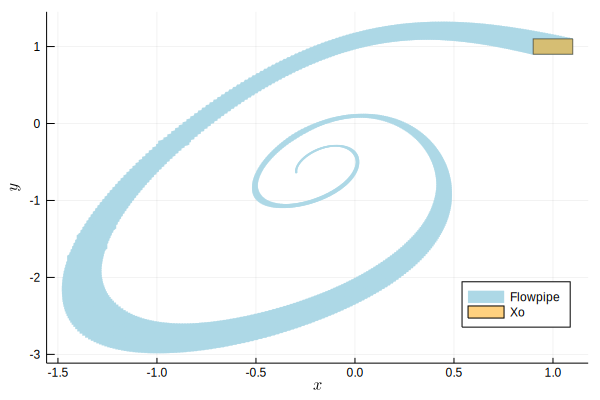

In [7]:
plot(sol, xlab=L"x", ylab=L"y", lw=0.2, color=:lightblue, lab="Flowpipe", legend=:bottomright)
plot!(X₀, color=:orange, lab="Xo")